In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
train_dir = Path("_data/2021-05-13-v2")
train_dfs = list(train_dir.glob("*train.csv.zip"))
print(train_dfs)
out_dfs = []
for k, train_df in enumerate(train_dfs):
    out_df = pd.read_csv(train_df)
    out_dfs.append(out_df)
out_df = pd.concat(out_dfs)

[PosixPath('_data/2021-05-13-v2/0-train.csv.zip'), PosixPath('_data/2021-05-13-v2/1-train.csv.zip'), PosixPath('_data/2021-05-13-v2/2-train.csv.zip'), PosixPath('_data/2021-05-13-v2/3-train.csv.zip')]


/mnt/ws/home/sshah/anaconda3/envs/adadamp/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
print(out_df)

In [17]:
out_df = out_df.iloc[1:]

In [23]:
sorted(list(out_df.columns))

['_batch_grad_norm',
 '_batch_grad_norm2',
 '_grad_mavg',
 '_initial_factor',
 '_initial_loss',
 '_initial_norm2',
 '_loss_mavg',
 '_step_time',
 'batch_loss',
 'batch_size_',
 'damper',
 'damping',
 'dampingdelay',
 'dampingfactor',
 'device_type',
 'dwell',
 'epochs',
 'fn_class',
 'initial_batch_size',
 'len_dataset',
 'loss_name',
 'lr_',
 'max_batch_size',
 'model_updates',
 'num_examples',
 'num_params',
 'opt_name',
 'opt_param_dampening',
 'opt_param_eps',
 'opt_param_initial_accumulator_value',
 'opt_param_lr',
 'opt_param_lr_decay',
 'opt_param_momentum',
 'opt_param_nesterov',
 'opt_param_weight_decay',
 'random_state',
 'rho',
 'step_time',
 'time']

In [15]:
out_df.damping

0                            NaN
1                             64
2                             64
3                             64
4                             64
                 ...            
196    1490116119384765704962048
197    1490116119384765704962048
198    1490116119384765704962048
199    7450580596923827719503872
200    7450580596923827719503872
Name: damping, Length: 798, dtype: object

In [16]:
1490116119384765704962048/2**77

9.860761315262648

In [6]:
out_df.describe()

,epoch_time,initial_batch_size,max_batch_size,batch_growth_rate,dampingfactor,dampingdelay,epochs,verbose,lr,random_state,...,opt_param_lr_decay,opt_param_eps,opt_param_initial_accumulator_value,_initial_norm2,_batch_grad_norm2,_batch_grad_norm,_initial_loss,_grad_mavg,_loss_mavg,_initial_factor
count,7.980000e+02,798.000000,798.000000,7.980000e+02,798.0,798.000000,798.000000,798.0,798.000000,798.0,...,201.0,2.010000e+02,201.0,1.980000e+02,198.000000,198.000000,1.980000e+02,198.000000,198.000000,1.980000e+02
mean,1.620939e+09,112.360902,13628.230576,1.000000e-02,5.0,5.498747,100.056137,5.0,0.014428,1000.0,...,0.0,1.000000e-10,0.0,9.490940e+07,0.761279,0.568532,2.302996e+00,1.026209,0.080705,1.863394e+01
std,6.125779e+03,83.398035,20007.311203,3.471623e-18,0.0,0.500312,58.216124,0.0,0.005106,0.0,...,0.0,1.295697e-26,0.0,1.493893e-08,2.618236,0.663531,4.452149e-16,0.969871,0.155406,3.561719e-15
min,1.620929e+09,64.000000,64.000000,1.000000e-02,5.0,5.000000,0.000000,5.0,0.005633,1000.0,...,0.0,1.000000e-10,0.0,9.490940e+07,0.005131,0.071629,2.302996e+00,0.071399,0.005593,1.863394e+01
25%,1.620934e+09,64.000000,64.000000,1.000000e-02,5.0,5.000000,49.808000,5.0,0.005633,1000.0,...,0.0,1.000000e-10,0.0,9.490940e+07,0.010198,0.100983,2.302996e+00,0.212242,0.009320,1.863394e+01
50%,1.620939e+09,64.000000,2048.000000,1.000000e-02,5.0,5.000000,99.960000,5.0,0.017389,1000.0,...,0.0,1.000000e-10,0.0,9.490940e+07,0.034757,0.186431,2.302996e+00,0.686936,0.021091,1.863394e+01
75%,1.620944e+09,256.000000,48000.000000,1.000000e-02,5.0,6.000000,150.324000,5.0,0.017389,1000.0,...,0.0,1.000000e-10,0.0,9.490940e+07,0.911128,0.954530,2.302996e+00,1.707613,0.084572,1.863394e+01
max,1.620950e+09,256.000000,48000.000000,1.000000e-02,5.0,6.000000,200.956083,5.0,0.017389,1000.0,...,0.0,1.000000e-10,0.0,9.490940e+07,35.122424,5.926417,2.302996e+00,6.828069,1.318163,1.863394e+01


In [67]:
df = out_df

In [ ]:
fig, ax = plt.subplots()
# ax.set_yscale("log", basey=2)
# ax.set_xlim(0, 0.2e7)

for i in out_dfs:
    print(i.damper.unique())
    
# out_dfs[0].plot(x="epochs", y="test_accuracy", ax=ax, label=out_df)
# out_dfs[1].plot(x="epochs", y="test_accuracy", ax=ax, label=out_df)
out_dfs[2].plot(x="epochs", y="test_accuracy", ax=ax, label=out_df)
# out_dfs[3].plot(x="epochs", y="test_accuracy", ax=ax, label=out_df)

In [8]:
out_df.damper.unique()

array(['geodamp', 'adagrad', 'radadamp', 'geodamplr'], dtype=object)

<ipython-input-43-510aa8b5cfeb>:2: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=2)


(1e-06, 1)

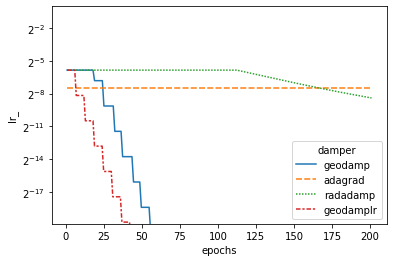

In [43]:
ax = sns.lineplot(x="epochs", y="lr_", hue="damper", data=df, ci=None, style="damper")
ax.set_yscale("log", basey=2)
ax.set_ylim(1e-6, 1)

<ipython-input-65-0d017a502213>:2: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=2)


(0.0, 15000.0)

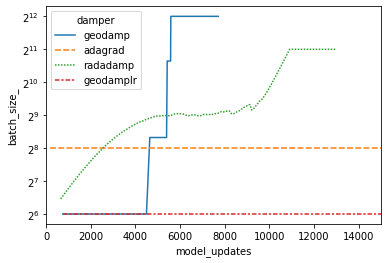

In [65]:
ax = sns.lineplot(x="model_updates", y="batch_size_", hue="damper", data=df, ci=None, style="damper")
ax.set_yscale("log", basey=2)
ax.set_xlim(0, 15000)
# ax.set_ylim(2**-20, 2**-4)

In [ ]:
ax = sns.lineplot(x="epochs", y="damping", hue="damper", data=df, ci=None, style="damper")
ax.set_yscale("log", basey=2)

<ipython-input-62-1f18e1f50726>:2: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=2)


(9.5367431640625e-07, 0.0625)

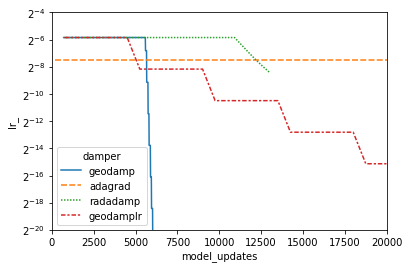

In [62]:
ax = sns.lineplot(x="model_updates", y="lr_", hue="damper", data=df, ci=None, style="damper")
ax.set_yscale("log", basey=2)
ax.set_xlim(0, 20000)
ax.set_ylim(2**-20, 2**-4)

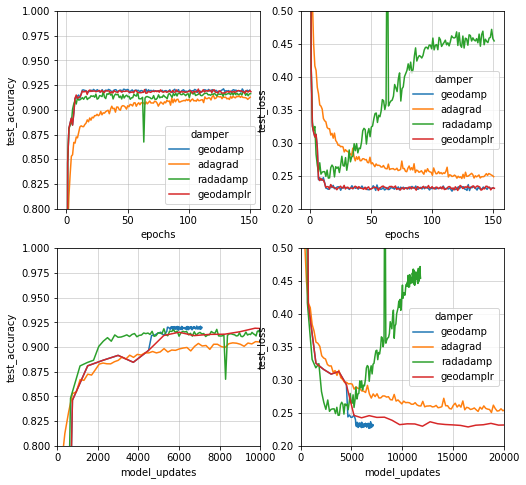

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
w = 8
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(w, w))

for i, x in enumerate(["epochs", "model_updates"]):
    for j, y in enumerate(["test_accuracy", "test_loss"]):
        idx = ~df.damper.isin([])
        show = df[idx].copy()
        show = show[show.epochs <= 150 + 1]
        ax = sns.lineplot(
            data=show,
            x=x,
            y=y,
            hue="damper",
            ax=axs[i][j],
            ci=None,
#             ci="sd",
#             ci=95,
            estimator=np.median,
        )
#         if "model" in x:
#             ax.set_xscale("log", basex=2)
#             ax.set_xlim(2**11, None)
#         if "accuracy" in y:
#             ax.set_ylim(0.85, 0.92)
        if "loss" in y:
            ax.set_ylim(0.2, 0.5)
        if "loss" in y and "updates" in x:
            ax.set_xlim(0, 20_000)
        if "acc" in y:
            ax.set_ylim(0.8,1)
        if "acc" in y and "updates" in x:
            ax.set_xlim(0, 10_000)
        ax.grid(alpha=0.6)
        if "acc" in y and "model" in x:
            ax.legend_.remove()

<ipython-input-68-d2647c9ec9e7>:5: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=2)


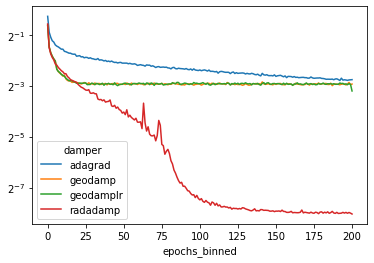

In [68]:
show = df.copy()
show["epochs_binned"] = show["epochs"].astype(int)
show = show.pivot_table(index="epochs_binned", columns="damper", values="batch_loss", aggfunc="mean")
ax = show.plot()
ax.set_yscale("log", basey=2)

<ipython-input-51-99b8b51a193e>:5: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=2)


(0.0, 20000.0)

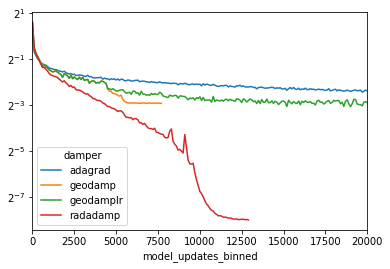

In [51]:
show = df.copy()
show["model_updates_binned"] = (show["model_updates"]/100).astype(int)*100
show = show.pivot_table(index="model_updates_binned", columns="damper", values="batch_loss", aggfunc="mean")
ax = show.plot()
ax.set_yscale("log", basey=2)
ax.set_xlim(0, 20000)